## Decision Trees: Classification

See if you can do something similar to what we did for regression, but for a classification problem. For this we will use the famous [iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set). Use our code for regression as a guide. 

This dataset is included in sklearn, so we can use the built-in functions to load the data for use. 

In [1]:
from sklearn.datasets import load_iris  # import the function to load the iris data

iris = load_iris()   # use the function to actually load the data for use in this notebook

from sklearn.tree import DecisionTreeClassifier      # code to create a decision tree for classification
from sklearn import tree                             # code to visualize a decision tree
import matplotlib.pyplot as plt                      # needed to draw the nodes and branches
import pandas as pd 
import numpy as np

The variable `iris` works just like a dictionary. Explore this dictionary to see if you can find the necessary data and then create and visualize a decision tree for this data. 

In [2]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [3]:
X = iris['data']

In [4]:
type(iris['data'])

numpy.ndarray

In [5]:
y = iris.target

In [6]:
clf = DecisionTreeClassifier()
clf.fit(X,y)

DecisionTreeClassifier()

In [7]:
clf.score(X, y)

1.0

In [15]:
clf.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.95, random_state=42)

In [11]:
clf.fit(X_train, y_train)
clf.score(X_train, y_train)

1.0

In [12]:
clf.score(X_test, y_test)

0.8111888111888111

In [13]:
X_test.shape

(143, 4)

In [14]:
X_train.shape

(7, 4)

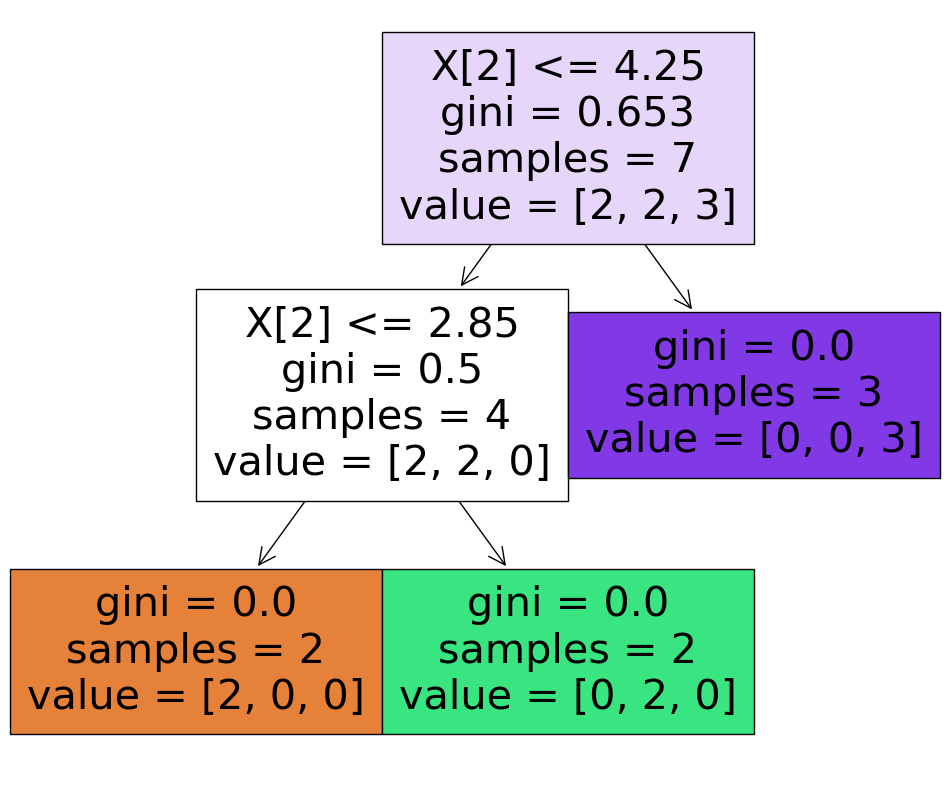

In [15]:
fig = plt.figure(figsize=(12,10))             
_ = tree.plot_tree(clf, filled=True)

### Gini Impurity

Check the scikit-learn documentation for a decision tree classifier to see where this hyperparameter is set. **What other options are there?**

 The formula for the Gini Impurity is:

$$
G = \sum_c p_c (1 - p_c)
$$

See Victor Zhou's [blog post](https://victorzhou.com/blog/gini-impurity/) for mored details on Gini impurity.

#### Visualize the Gini Impurity

a probability to incorrect way to classify a data

4 markers = 2 green and 2 red

pick up a marker, replace, and pick up another marker

g sample   g prediction  0.5*0.5=0.25
r sample   g prediction  0.5*0.5=0.25   - incorrect classification
r sample   r prediction  0.5*0.5=0.25
g sample   r prediction  0.5*0.5=0.25   - incorrect classification

In [ ]:
0.5(0.5) + 0.5(0.5)
0.25 + 0.25
0.5

In [48]:
G = []

for i in range(0,100):
    r = i 
    g = 100 - r
    p_r = r / 100
    p_g = g / 100
    gini = p_r*(1 - p_r) + p_g*(1 - p_g)
    G.append(gini)

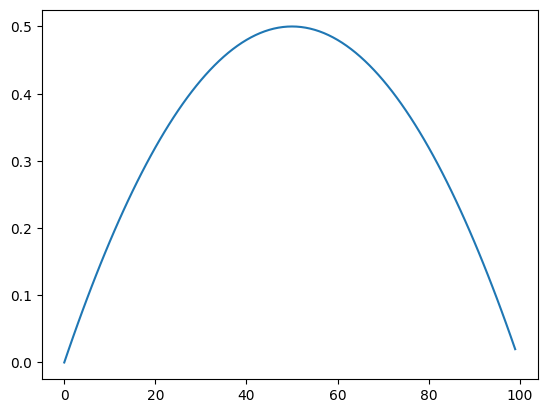

In [49]:
plt.plot(range(0, 100), G)

#### Calculating the Gini impurity

Using the breast cancer data that comes with scikit-learn, create a pruned decision tree (maximum depth of 3) and visualize the tree. 

Using the information provided in the visualized tree, calculate the Gini Impurity for the root node and after the first split.
After a split, you need to remember to take the weighted average of G across the two resulting nodes. 

Compare your answers to the values noted in the visualized tree.

In [59]:
# Only use these features
features = ['radius error', 'texture error', 'concave points error',
            'symmetry error', 'worst texture', 'worst smoothness',
            'worst symmetry']

In [50]:
from sklearn.datasets import load_breast_cancer

In [51]:
cancer = load_breast_cancer()

In [54]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [58]:
df = pd.DataFrame(cancer['data'], columns = cancer['feature_names'])
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [62]:
df_small = df[features]
df_small.head()

,radius error,texture error,concave points error,symmetry error,worst texture,worst smoothness,worst symmetry
0,1.0950,0.9053,0.01587,0.03003,17.33,0.1622,0.4601
1,0.5435,0.7339,0.01340,0.01389,23.41,0.1238,0.2750
2,0.7456,0.7869,0.02058,0.02250,25.53,0.1444,0.3613
3,0.4956,1.1560,0.01867,0.05963,26.50,0.2098,0.6638
4,0.7572,0.7813,0.01885,0.01756,16.67,0.1374,0.2364


In [63]:
clf_cancer = DecisionTreeClassifier(max_depth = 3, random_state = 42)
clf_cancer.fit(df_small.values, cancer['target'])

DecisionTreeClassifier(max_depth=3, random_state=42)

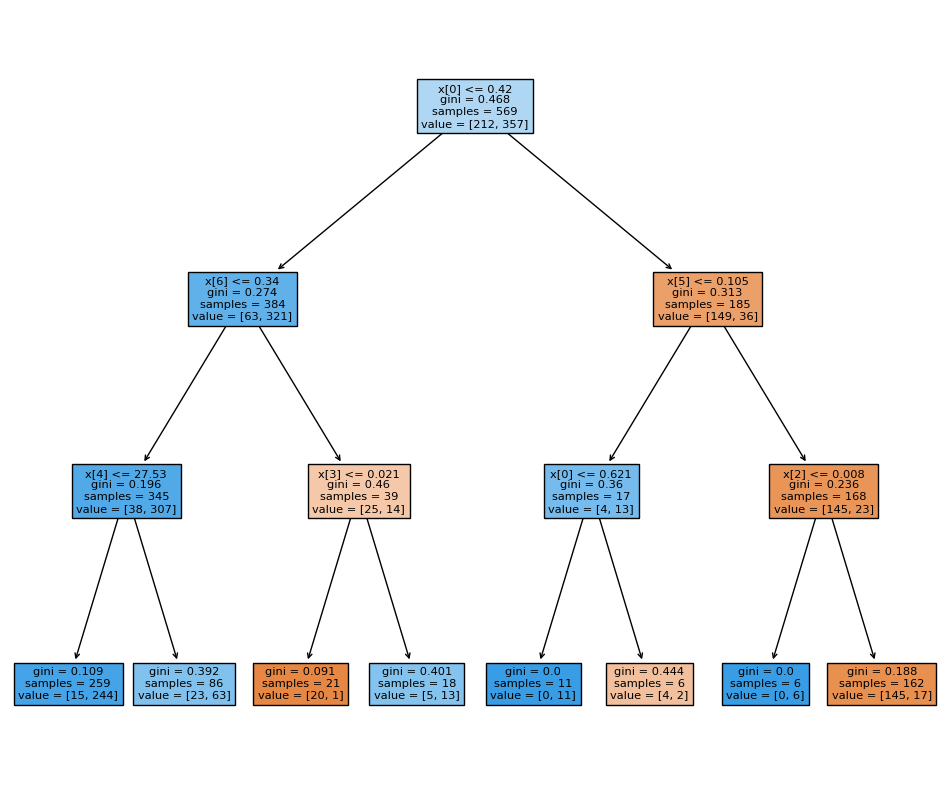

In [64]:
fig = plt.figure(figsize=(12,10))             
_ = tree.plot_tree(clf_cancer, filled=True)

In [67]:
def gini(n0, n1):
    n = n0 + n1
    p0 = n0 / n
    p1 = n1/ n
    G = p0*(1 - p0) + p1*(1-p1)
    return round(G, 3)        

In [68]:
gini(212, 357)

0.468

In [73]:
# Blue
gini(63,321)

0.274

In [74]:
# Orange
gini(149,36)

0.313

In [75]:
gini_total = (384/569)*gini(63,321) + (185/569)*gini(149,36)
gini_total

0.28668014059753955